<a href="https://colab.research.google.com/github/kairamilanifitria/PurpleBox-Intern/blob/main/02_11_InternVL1_4B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# try qwen 3B

In [ ]:
pip install git+https://github.com/huggingface/transformers accelerate

In [ ]:
pip install qwen-vl-utils[decord]==0.0.8

In [ ]:
!pip install torch

In [ ]:
!pip install -U flash-attn --no-build-isolation

In [5]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch

# We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2.5-VL-3B-Instruct",
    torch_dtype=torch.bfloat16,
    attn_implementation=
    "flash_attention_2",
    device_map="auto",
)

# The default range for the number of visual tokens per image in the model is 4-16384.
# You can set min_pixels and max_pixels according to your needs, such as a token range of 256-1280, to balance performance and cost.
min_pixels = 256*28*28
max_pixels = 1280*28*28
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-3B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.53G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [6]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "/content/_page_0_Picture_2.jpeg",
            },
            {"type": "text", "text": "Describe this image."},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

In [7]:
# Ensure inputs are properly processed
text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
image_inputs, video_inputs = process_vision_info(messages)

inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)

# Move tensors to CUDA properly
inputs = {k: v.to("cuda") for k, v in inputs.items() if isinstance(v, torch.Tensor)}

# Debug: Check if inputs are valid
print(inputs)


{'input_ids': tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
         151645,    198, 151644,    872,    198, 151652, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         15165

In [8]:
# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

RuntimeError: FlashAttention only supports Ampere GPUs or newer.

flash attention cant run in T4 GPU, it only run in A100 or newer gpu

In [26]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch

# We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2.5-VL-3B-Instruct",
    torch_dtype=torch.float16,
    attn_implementation=None,
    device_map="auto",
)

# The default range for the number of visual tokens per image in the model is 4-16384.
# You can set min_pixels and max_pixels according to your needs, such as a token range of 256-1280, to balance performance and cost.
min_pixels = 256*28*28
max_pixels = 1280*28*28
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-3B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [27]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "/content/_page_0_Picture_2.jpeg",
            },
            {"type": "text", "text": "Describe this image."},
        ],
    }
]

# Convert input to model-compatible format
text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
image_inputs, video_inputs = process_vision_info(messages)

# Process inputs
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)

# ✅ Debug: Print tensor devices before moving to CUDA
for k, v in inputs.items():
    if isinstance(v, torch.Tensor):
        print(f"{k} is on {v.device}")

# ✅ Ensure all inputs are on CUDA
inputs = {k: v.to("cuda") if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}

# ✅ Debug: Print tensor devices after moving to CUDA
for k, v in inputs.items():
    if isinstance(v, torch.Tensor):
        print(f"{k} is now on {v.device}")

# ✅ Ensure model is on CUDA
model.to("cuda")

input_ids is on cpu
attention_mask is on cpu
pixel_values is on cpu
image_grid_thw is on cpu
input_ids is now on cuda:0
attention_mask is now on cuda:0
pixel_values is now on cuda:0
image_grid_thw is now on cuda:0


Qwen2_5_VLForConditionalGeneration(
  (visual): Qwen2_5_VisionTransformerPretrainedModel(
    (patch_embed): Qwen2_5_VisionPatchEmbed(
      (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
    )
    (rotary_pos_emb): Qwen2_5_VisionRotaryEmbedding()
    (blocks): ModuleList(
      (0-31): 32 x Qwen2_5_VLVisionBlock(
        (norm1): Qwen2RMSNorm((1280,), eps=1e-06)
        (norm2): Qwen2RMSNorm((1280,), eps=1e-06)
        (attn): Qwen2_5_VLVisionSdpaAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (mlp): Qwen2_5_VLMLP(
          (gate_proj): Linear(in_features=1280, out_features=3420, bias=True)
          (up_proj): Linear(in_features=1280, out_features=3420, bias=True)
          (down_proj): Linear(in_features=3420, out_features=1280, bias=True)
          (act_fn): SiLU()
        )
      )
    )
    (merger): Qwen2_5_VLPatchMerger

In [28]:
# Run inference
generated_ids = model.generate(**inputs, max_new_tokens=64)  # Start with smaller max tokens

# Post-process output
generated_ids_trimmed = [
    out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs["input_ids"], generated_ids)
]
output_text = processor.batch_decode(generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False)

print(output_text)

['The image depicts a metallic, circular object that appears to be an industrial or mechanical device. The primary component is a large, perforated metal disc with a series of evenly spaced holes arranged in concentric circles. This disc is mounted on a black, rectangular base that supports it from below. The base has two vertical arms']


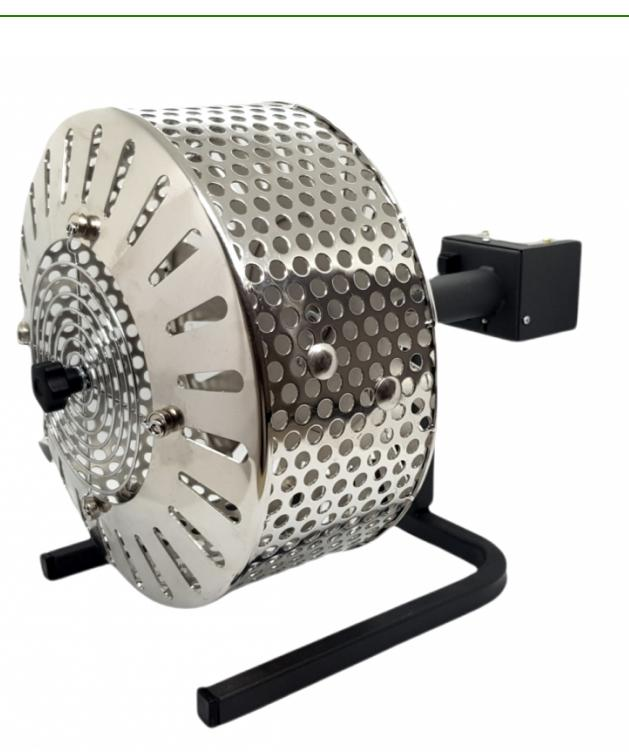

In [2]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch

# We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2.5-VL-3B-Instruct",
    torch_dtype=torch.float16,
    attn_implementation=None,
    device_map="auto",
)

# The default range for the number of visual tokens per image in the model is 4-16384.
# You can set min_pixels and max_pixels according to your needs, such as a token range of 256-1280, to balance performance and cost.
min_pixels = 256*28*28
max_pixels = 1280*28*28
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-7B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "/content/modello-730-2020-FERIGO-FRANCESCA.jpg",
            },
            {"type": "text", "text": "Do the OCR and Take all information from images. Maybe some images contains complex tables, try to recognize the column name and the values related. Then make a very detailed description about the image, dont hallucinate the answer, only use the information you got from the images."},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)

In [38]:
# Inference: Generation of the output if the prompt short
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

['The image is an Italian tax form, specifically the "Modello 730/2020" for income tax declaration in 2019. The form is titled "Redditi 2019," which translates to "Income 2019." It is filled out by a taxpayer named Ferigo Francesca, with her tax code (codice fiscale) being FRGFNC70B63L781I.\n\nThe form includes various sections:\n\n1. **Contribuente (Taxpayer)**: Information about the taxpayer, including their name, date of birth, place']


In [5]:
# Inference: Generation of the output with detailed prompt
for k, v in inputs.items():
  if isinstance(v, torch.Tensor):
    inputs[k] = v.to("cuda")

generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

['The image is a scanned copy of an Italian tax declaration form titled "MODELLO 730/2020 Redditi 2019." The document appears to be a comprehensive form for reporting income and other financial details for the year 2019. Here\'s a detailed breakdown of the information present in the form:\n\n### Header Information:\n- **Form Title:** MODELLO 730/2020 Redditi 2019\n- **Contribuenti:** Contribuenti (Taxpayers)\n- **Dichiarante:** X Coniuge Dichiarante']


In [8]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "/content/modello-730-2020-FERIGO-FRANCESCA.jpg",
            },
            {"type": "text", "text": "Take all information from images."},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)

In [9]:
# Inference: Generation of the output with detailed prompt
for k, v in inputs.items():
  if isinstance(v, torch.Tensor):
    inputs[k] = v.to("cuda")

generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

['Here is the extracted information from the image:\n\n---\n\n**Contribuenti**\n\n- **Dichiarante**: X\n- **Codice Fiscale del Contribuente**: FRGFC70B63J781I\n- **Nome**: FERIGO FRANCESCA\n- **Data di Nascita**: 23 02 1970\n- **Comune di Nascita**: VERONA\n- **Provincia (sigla)**: VR\n- **C.F.**: F\n- **Residenza Anagrafica**: \n  - **Tipoologia']


# try internvl 1B

In [10]:
pip install lmdeploy>=0.6.4 --no-deps

In [11]:
!pip install mmengine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.7/452.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 20.0 MB/s eta 0:00:00


In [12]:
!pip install fire

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=516f91f7e8f1f2afb425ec9c1ffa4a687d842379291d869843099b83cfa171e0
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lmdeploy 0.7.0.post3 requires fastapi, which is not installed.
lmdeploy 0.7.0.post3 requires mmengine-lite, which is not installed.
lmdeploy 0.7.0.post3 requires outlines<0.1.0, which is not installed.
lmdeploy 0.7.0.post3 requires pynvml, which is not installed.
lmdeploy 0.7.0.post3 requires shortuuid, which is not installed.
lmdeploy 0.7.0.post3 requires tiktoken, which is not installed.
lmdeploy 0.7.0.post3 requires uvi

In [13]:
!pip install decord

In [ ]:
import numpy as np
import torch
import torchvision.transforms as T
from decord import VideoReader, cpu
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
from transformers import AutoModel, AutoTokenizer

path = 'OpenGVLab/InternVL2_5-1B'
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=True,
    trust_remote_code=True).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)

In [8]:
IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

def build_transform(input_size):
    MEAN, STD = IMAGENET_MEAN, IMAGENET_STD
    transform = T.Compose([
        T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
        T.Resize((input_size, input_size), interpolation=InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize(mean=MEAN, std=STD)
    ])
    return transform

def find_closest_aspect_ratio(aspect_ratio, target_ratios, width, height, image_size):
    best_ratio_diff = float('inf')
    best_ratio = (1, 1)
    area = width * height
    for ratio in target_ratios:
        target_aspect_ratio = ratio[0] / ratio[1]
        ratio_diff = abs(aspect_ratio - target_aspect_ratio)
        if ratio_diff < best_ratio_diff:
            best_ratio_diff = ratio_diff
            best_ratio = ratio
        elif ratio_diff == best_ratio_diff:
            if area > 0.5 * image_size * image_size * ratio[0] * ratio[1]:
                best_ratio = ratio
    return best_ratio

def dynamic_preprocess(image, min_num=1, max_num=12, image_size=448, use_thumbnail=False):
    orig_width, orig_height = image.size
    aspect_ratio = orig_width / orig_height

    # calculate the existing image aspect ratio
    target_ratios = set(
        (i, j) for n in range(min_num, max_num + 1) for i in range(1, n + 1) for j in range(1, n + 1) if
        i * j <= max_num and i * j >= min_num)
    target_ratios = sorted(target_ratios, key=lambda x: x[0] * x[1])

    # find the closest aspect ratio to the target
    target_aspect_ratio = find_closest_aspect_ratio(
        aspect_ratio, target_ratios, orig_width, orig_height, image_size)

    # calculate the target width and height
    target_width = image_size * target_aspect_ratio[0]
    target_height = image_size * target_aspect_ratio[1]
    blocks = target_aspect_ratio[0] * target_aspect_ratio[1]

    # resize the image
    resized_img = image.resize((target_width, target_height))
    processed_images = []
    for i in range(blocks):
        box = (
            (i % (target_width // image_size)) * image_size,
            (i // (target_width // image_size)) * image_size,
            ((i % (target_width // image_size)) + 1) * image_size,
            ((i // (target_width // image_size)) + 1) * image_size
        )
        # split the image
        split_img = resized_img.crop(box)
        processed_images.append(split_img)
    assert len(processed_images) == blocks
    if use_thumbnail and len(processed_images) != 1:
        thumbnail_img = image.resize((image_size, image_size))
        processed_images.append(thumbnail_img)
    return processed_images

def load_image(image_file, input_size=448, max_num=12):
    image = Image.open(image_file).convert('RGB')
    transform = build_transform(input_size=input_size)
    images = dynamic_preprocess(image, image_size=input_size, use_thumbnail=True, max_num=max_num)
    pixel_values = [transform(image) for image in images]
    pixel_values = torch.stack(pixel_values)
    return pixel_values

In [ ]:
# set the max number of tiles in `max_num`
pixel_values = load_image('/content/modello-730-2020-FERIGO-FRANCESCA.jpg', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)

## 1B

In [10]:
# single-image single-round conversation (单图单轮对话)
question = '<image>\nExtract information details only based in the image.'
response = model.chat(tokenizer, pixel_values, question, generation_config)
print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Extract information details only based in the image.
Assistant: Certainly! Here is the extracted information from the image:

### Contributions
- **Name:** Ferico Francesca
- **Date of Birth:** 23rd of May 1970

### Resident Agrico
- **Name:** Francesca
- **Appellation:** Comune di Verona
- **Address:** Al 01/01/2019

### Filiari A Carico
- **Class:** 3
- **Number:** 1

### Distribuzione
- **Codice Fissa:** 01527330235
- **Comune:** Verona (L781), VR
- **Particolari:** 0458052811.12
- **Firma:** personale@eu.sr.vr.it

### Syndizio
- **Codice Sedde:** 01/


## 4B

In [14]:
# single-image single-round conversation (单图单轮对话)
question = '<image>\nExtract information details only based in the image.'
response = model.chat(tokenizer, pixel_values, question, generation_config)
print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Extract information details only based in the image.
Assistant: **Modello 730/2020**

**Condivenuta per i redditi 2019**
Mod. A N: 1

**Dati I contribuente**
- **Codice fiscale del contribuente**: FRGFNC70B63L781I
- **Soggetto fisc. a cui sottostanno**: Verona
- **Cognome**: Ferigo
- **Nome**: Francesca
- **Sesso**: F
- **Data di nascita**: 23 giu 1970
- **Comune di nascita (per l"data indicare il comune o lo stato oltre)**: Verona
- **Residenza anagrafica**: Da Verona (la 1 di janu 2019) a Verona (la 7 di janu 2020)

**Domiciilio fiscale**
- **Via**: Via G. dell'Ariestri
- **Città**: Verona
- **Cap**: 37100
- **Tipo e indirizzo di posta elettronica**: Personale@suva.vr.it

**Familiari a carico**
- **Codice fiscale del coniuge**: DMAGLI70S09F8610
- **Coniuge**: 50%
- **Altri**: 7%

**Dati del sostituto di imposta che effettuera' il conguaggio**
- **Soggetto fisc. a cui sottostano**: SUA di Verona
- **Codice fiscale**: 01527330235
- **Comune di riscossione**: Verona

**Fir

## OpenGVLab/InternVL2-2B

In [5]:
import numpy as np
import torch
import torchvision.transforms as T
from decord import VideoReader, cpu
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
from transformers import AutoModel, AutoTokenizer

path = 'OpenGVLab/InternVL2-2B'
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=False,
    trust_remote_code=True).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)

In [6]:
IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

def build_transform(input_size):
    MEAN, STD = IMAGENET_MEAN, IMAGENET_STD
    transform = T.Compose([
        T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
        T.Resize((input_size, input_size), interpolation=InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize(mean=MEAN, std=STD)
    ])
    return transform

def find_closest_aspect_ratio(aspect_ratio, target_ratios, width, height, image_size):
    best_ratio_diff = float('inf')
    best_ratio = (1, 1)
    area = width * height
    for ratio in target_ratios:
        target_aspect_ratio = ratio[0] / ratio[1]
        ratio_diff = abs(aspect_ratio - target_aspect_ratio)
        if ratio_diff < best_ratio_diff:
            best_ratio_diff = ratio_diff
            best_ratio = ratio
        elif ratio_diff == best_ratio_diff:
            if area > 0.5 * image_size * image_size * ratio[0] * ratio[1]:
                best_ratio = ratio
    return best_ratio

def dynamic_preprocess(image, min_num=1, max_num=12, image_size=448, use_thumbnail=False):
    orig_width, orig_height = image.size
    aspect_ratio = orig_width / orig_height

    # calculate the existing image aspect ratio
    target_ratios = set(
        (i, j) for n in range(min_num, max_num + 1) for i in range(1, n + 1) for j in range(1, n + 1) if
        i * j <= max_num and i * j >= min_num)
    target_ratios = sorted(target_ratios, key=lambda x: x[0] * x[1])

    # find the closest aspect ratio to the target
    target_aspect_ratio = find_closest_aspect_ratio(
        aspect_ratio, target_ratios, orig_width, orig_height, image_size)

    # calculate the target width and height
    target_width = image_size * target_aspect_ratio[0]
    target_height = image_size * target_aspect_ratio[1]
    blocks = target_aspect_ratio[0] * target_aspect_ratio[1]

    # resize the image
    resized_img = image.resize((target_width, target_height))
    processed_images = []
    for i in range(blocks):
        box = (
            (i % (target_width // image_size)) * image_size,
            (i // (target_width // image_size)) * image_size,
            ((i % (target_width // image_size)) + 1) * image_size,
            ((i // (target_width // image_size)) + 1) * image_size
        )
        # split the image
        split_img = resized_img.crop(box)
        processed_images.append(split_img)
    assert len(processed_images) == blocks
    if use_thumbnail and len(processed_images) != 1:
        thumbnail_img = image.resize((image_size, image_size))
        processed_images.append(thumbnail_img)
    return processed_images

def load_image(image_file, input_size=448, max_num=12):
    image = Image.open(image_file).convert('RGB')
    transform = build_transform(input_size=input_size)
    images = dynamic_preprocess(image, image_size=input_size, use_thumbnail=True, max_num=max_num)
    pixel_values = [transform(image) for image in images]
    pixel_values = torch.stack(pixel_values)
    return pixel_values

In [ ]:
pixel_values = load_image('/content/modello-730-2020-FERIGO-FRANCESCA.jpg', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)
model.to("cuda")

In [10]:
# single-image single-round conversation (单图单轮对话)
question = '<image>\nDo the OCR and Take all information from images. Maybe some images contains complex tables, try to recognize the column name and the values related. Then make a very detailed description about the image,take only correct information from the images.'
response = model.chat(tokenizer, pixel_values, question, generation_config)
print(f'User: {question}\nAssistant: {response}')

User: <image>
Do the OCR and Take all information from images. Maybe some images contains complex tables, try to recognize the column name and the values related. Then make a very detailed description about the image,take only correct information from the images.
Assistant: The image contains a document with a lot of details and is in Italian. Here’s a highly detailed description:

**Header Section:**
- **Company Information:**
  - FRGFCN70B63L7811
  - This appears to be a code for a Fiscal entity.
  - Name: FRAMESCA

**Date and Location Information:**
- **Date of Transaction:** 
  - Dati del Contribuente: 23/02/1971
  - Codice Fiscal del Contribuente: FRGFCN70B63L7811

**Residence Information:**
- **Residence:** COMUNE (O Stato estero) DI NASCITA
- **Province:** VR
- **Location:** VERONA (L781)
- **Phone Number:** N° 458052811
- **Email:** personale@esus.vr.it

**Account Information:**
- **Financial Account:** 
  - Soggetto finanziario: Soggetto di Anchimazione Fiscale (SAF) e finanzi

# modify to process multiple images

In [ ]:
!pip install pdf2image
!apt-get install poppler-utils -y

In [5]:
import os
from pdf2image import convert_from_path

def pdf_to_images(pdf_path, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # 👇 Define poppler_path (modify with your actual path if needed)
    poppler_path = "/usr/bin"

    # Convert PDF to images, specifying poppler_path
    images = convert_from_path(pdf_path, poppler_path=poppler_path)

    # Save images
    image_paths = []
    for i, image in enumerate(images):
        image_path = os.path.join(output_folder, f'page_{i + 1}.png')
        image.save(image_path, 'PNG')
        image_paths.append(image_path)

    return image_paths

In [6]:
# Example usage
pdf_path = "/content/drive/MyDrive/document rag/modello-3page.pdf"  # Change this to your PDF file path
output_folder = "/content/images_extracted"
image_paths = pdf_to_images(pdf_path, output_folder)

print("Saved images:")
for path in image_paths:
    print(path)

Saved images:
/content/images_extracted/page_1.png
/content/images_extracted/page_2.png
/content/images_extracted/page_3.png


using 1B

In [31]:
import numpy as np
import torch
import torchvision.transforms as T
from decord import VideoReader, cpu
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
from transformers import AutoModel, AutoTokenizer

path = 'OpenGVLab/InternVL2_5-1B'
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=True,
    trust_remote_code=True).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)

In [32]:
IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

def build_transform(input_size):
    MEAN, STD = IMAGENET_MEAN, IMAGENET_STD
    transform = T.Compose([
        T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
        T.Resize((input_size, input_size), interpolation=InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize(mean=MEAN, std=STD)
    ])
    return transform

def find_closest_aspect_ratio(aspect_ratio, target_ratios, width, height, image_size):
    best_ratio_diff = float('inf')
    best_ratio = (1, 1)
    area = width * height
    for ratio in target_ratios:
        target_aspect_ratio = ratio[0] / ratio[1]
        ratio_diff = abs(aspect_ratio - target_aspect_ratio)
        if ratio_diff < best_ratio_diff:
            best_ratio_diff = ratio_diff
            best_ratio = ratio
        elif ratio_diff == best_ratio_diff:
            if area > 0.5 * image_size * image_size * ratio[0] * ratio[1]:
                best_ratio = ratio
    return best_ratio

def dynamic_preprocess(image, min_num=1, max_num=12, image_size=448, use_thumbnail=False):
    orig_width, orig_height = image.size
    aspect_ratio = orig_width / orig_height

    # calculate the existing image aspect ratio
    target_ratios = set(
        (i, j) for n in range(min_num, max_num + 1) for i in range(1, n + 1) for j in range(1, n + 1) if
        i * j <= max_num and i * j >= min_num)
    target_ratios = sorted(target_ratios, key=lambda x: x[0] * x[1])

    # find the closest aspect ratio to the target
    target_aspect_ratio = find_closest_aspect_ratio(
        aspect_ratio, target_ratios, orig_width, orig_height, image_size)

    # calculate the target width and height
    target_width = image_size * target_aspect_ratio[0]
    target_height = image_size * target_aspect_ratio[1]
    blocks = target_aspect_ratio[0] * target_aspect_ratio[1]

    # resize the image
    resized_img = image.resize((target_width, target_height))
    processed_images = []
    for i in range(blocks):
        box = (
            (i % (target_width // image_size)) * image_size,
            (i // (target_width // image_size)) * image_size,
            ((i % (target_width // image_size)) + 1) * image_size,
            ((i // (target_width // image_size)) + 1) * image_size
        )
        # split the image
        split_img = resized_img.crop(box)
        processed_images.append(split_img)
    assert len(processed_images) == blocks
    if use_thumbnail and len(processed_images) != 1:
        thumbnail_img = image.resize((image_size, image_size))
        processed_images.append(thumbnail_img)
    return processed_images

def load_image(image_file, input_size=448, max_num=12):
    image = Image.open(image_file).convert('RGB')
    transform = build_transform(input_size=input_size)
    images = dynamic_preprocess(image, image_size=input_size, use_thumbnail=True, max_num=max_num)
    pixel_values = [transform(image) for image in images]
    pixel_values = torch.stack(pixel_values)
    return pixel_values

In [22]:
# batch inference, single image per sample (单图批处理)
pixel_values1 = load_image('/content/images_extracted/page_1.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values2 = load_image('/content/images_extracted/page_2.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values3 = load_image('/content/images_extracted/page_3.png', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)
num_patches_list = [pixel_values1.size(0), pixel_values2.size(0), pixel_values3.size(0)]
pixel_values = torch.cat((pixel_values1, pixel_values2, pixel_values3), dim=0)

questions = ['<image>\nMake the markdown file based on all information that available in the images.'] * len(num_patches_list)
responses = model.batch_chat(tokenizer, pixel_values,
                             num_patches_list=num_patches_list,
                             questions=questions,
                             generation_config=generation_config)
for question, response in zip(questions, responses):
    print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Make the markdown file based on all information that available in the images.
Assistant: ```markdown
# Fermo Francesca  
### Modello 730/2020 Redditi 2019

## Struttura di Dati

**CONTRIBUTENTI**  
- Codice Fiscale del Contribuente (obbligatorio):  
  - FRGNF-0C06B197811  
- Cognome per la donna indicata e i cognome della nuda  
  - FRGNC-70B86F811  
- DATI DEL **CONTRIBUENTE**  
  - Dati di data del contribuente: 23/02/1970  
- COMUNE  
  - Verona  
- PROVINCIA  
  - Verona (R)  
- NUM. civico  
  - 937100 (Tutte le comuni indicate nel codice fiscale)

**RESIDENZA ANAGRAFICA**  
- COMUNE  - **Verona** (R)  
- PROVINCIA  - **Verona**  
- NUM. CIVICO  - 9  
- ADMIERTO DI NOSTRO ITALIANO  
  - CARICO
```
User: <image>
Make the markdown file based on all information that available in the images.
Assistant: ```markdown
![FERIGO FRANCESCO](image_url)

# Quattro Renduti del Fabricatore e altri dati

## Quattro Renduti di Rebitto a 350

| **Renditore**         | **Utilizzo** | *

In [33]:
# batch inference, single image per sample (单图批处理)
pixel_values1 = load_image('/content/images_extracted/page_1.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values2 = load_image('/content/images_extracted/page_2.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values3 = load_image('/content/images_extracted/page_3.png', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)
num_patches_list = [pixel_values1.size(0), pixel_values2.size(0), pixel_values3.size(0)]
pixel_values = torch.cat((pixel_values1, pixel_values2, pixel_values3), dim=0)

questions = ['<image>\nDo the OCR and Take all information from images. Maybe some images contains complex tables, try to recognize the column name and the values related. Then make a very detailed description about the image, dont hallucinate the answer, only use the information you got from the images.'] * len(num_patches_list)
responses = model.batch_chat(tokenizer, pixel_values,
                             num_patches_list=num_patches_list,
                             questions=questions,
                             generation_config=generation_config)
for question, response in zip(questions, responses):
    print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Do the OCR and Take all information from images. Maybe some images contains complex tables, try to recognize the column name and the values related. Then make a very detailed description about the image, dont hallucinate the answer, only use the information you got from the images.
Assistant: The image provided is a Forma Diario delle Contribuzioni di Fornitori (DDCF) provided by Federico Francesco, dated 730/2020. The form is structured in multiple sections designed to collect information about businesses or contributors. Here's a detailed description of the content:

**Header:**
- **Document Number:** 730
- **Title:** Modello 730/2020
- **Date:** 09/07/19

**Sections:**
1. **Contruente:**
   - Firma conosciuta con: Cognome per donnell'indirizzo e cognome di lavoro del donnello.
   - Codice fiscale del conto.
   - Data del contribuo: 23/02/190.

2. **Indirizzo di anagraficatura:**
   - Numero di numerazione: 37100 (Papa).

3. **Proprietario (Owner):**
   - Name: Francesc

using 4B

In [23]:
import numpy as np
import torch
import torchvision.transforms as T
from decord import VideoReader, cpu
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
from transformers import AutoModel, AutoTokenizer

path = 'OpenGVLab/InternVL2_5-4B'
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=True,
    trust_remote_code=True).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [24]:
IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

def build_transform(input_size):
    MEAN, STD = IMAGENET_MEAN, IMAGENET_STD
    transform = T.Compose([
        T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
        T.Resize((input_size, input_size), interpolation=InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize(mean=MEAN, std=STD)
    ])
    return transform

def find_closest_aspect_ratio(aspect_ratio, target_ratios, width, height, image_size):
    best_ratio_diff = float('inf')
    best_ratio = (1, 1)
    area = width * height
    for ratio in target_ratios:
        target_aspect_ratio = ratio[0] / ratio[1]
        ratio_diff = abs(aspect_ratio - target_aspect_ratio)
        if ratio_diff < best_ratio_diff:
            best_ratio_diff = ratio_diff
            best_ratio = ratio
        elif ratio_diff == best_ratio_diff:
            if area > 0.5 * image_size * image_size * ratio[0] * ratio[1]:
                best_ratio = ratio
    return best_ratio

def dynamic_preprocess(image, min_num=1, max_num=12, image_size=448, use_thumbnail=False):
    orig_width, orig_height = image.size
    aspect_ratio = orig_width / orig_height

    # calculate the existing image aspect ratio
    target_ratios = set(
        (i, j) for n in range(min_num, max_num + 1) for i in range(1, n + 1) for j in range(1, n + 1) if
        i * j <= max_num and i * j >= min_num)
    target_ratios = sorted(target_ratios, key=lambda x: x[0] * x[1])

    # find the closest aspect ratio to the target
    target_aspect_ratio = find_closest_aspect_ratio(
        aspect_ratio, target_ratios, orig_width, orig_height, image_size)

    # calculate the target width and height
    target_width = image_size * target_aspect_ratio[0]
    target_height = image_size * target_aspect_ratio[1]
    blocks = target_aspect_ratio[0] * target_aspect_ratio[1]

    # resize the image
    resized_img = image.resize((target_width, target_height))
    processed_images = []
    for i in range(blocks):
        box = (
            (i % (target_width // image_size)) * image_size,
            (i // (target_width // image_size)) * image_size,
            ((i % (target_width // image_size)) + 1) * image_size,
            ((i // (target_width // image_size)) + 1) * image_size
        )
        # split the image
        split_img = resized_img.crop(box)
        processed_images.append(split_img)
    assert len(processed_images) == blocks
    if use_thumbnail and len(processed_images) != 1:
        thumbnail_img = image.resize((image_size, image_size))
        processed_images.append(thumbnail_img)
    return processed_images

def load_image(image_file, input_size=448, max_num=12):
    image = Image.open(image_file).convert('RGB')
    transform = build_transform(input_size=input_size)
    images = dynamic_preprocess(image, image_size=input_size, use_thumbnail=True, max_num=max_num)
    pixel_values = [transform(image) for image in images]
    pixel_values = torch.stack(pixel_values)
    return pixel_values

In [18]:
# batch inference, single image per sample (单图批处理)
pixel_values1 = load_image('/content/images_extracted/page_1.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values2 = load_image('/content/images_extracted/page_2.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values3 = load_image('/content/images_extracted/page_3.png', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)
num_patches_list = [pixel_values1.size(0), pixel_values2.size(0), pixel_values3.size(0)]
pixel_values = torch.cat((pixel_values1, pixel_values2, pixel_values3), dim=0)

questions = ['<image>\nExtract all of the information only from the image provided.'] * len(num_patches_list)
responses = model.batch_chat(tokenizer, pixel_values,
                             num_patches_list=num_patches_list,
                             questions=questions,
                             generation_config=generation_config)
for question, response in zip(questions, responses):
    print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Extract all of the information only from the image provided.
Assistant: Certainly! Here are the details extracted from the image:

---

**Modello 730/2020**

**Data**: 01/2020

**Contribuente**:  
- **Codice fiscale**: FRGFCN806317818
- **Nome**: FERIGO
- **Cognome**: FRANCESCA
- **Data di nascita**: 23/02/1970
- **Comune di nascita**: VERONA
- **Sesso**: F
- **Indirizzo domicilio attuale**:  
  - **Via**: RIO AL POMPEI 618
  - **Città**: VERONA
  - **Provincia**: VR
  - **Numero**:
    - Cap: 37100
    - Anno: 1993 (Variabile)

**Residenza**:  
- **Comune di residenza attuale**: VERONA
- **Codice fiscale**: 1L781

**Domestiche Alquide Comici**:

**Famigliare Al Carico**:

1. Famiglia del coniuge:
   - **Codice Fiscale**: DMGMI70090F8610
   - **Cit. della tutela**: Verona
   - **Tipo di immagine**: Foto documento fiscale attuale
   - **Dato di consegna**: 12/02/2020

2. Alquide (con familiari di minori)
   - **Codice Fiscale**: DMPI3R0380F861P
   - **Sesso**: M
   - **Num

In [25]:
# batch inference, single image per sample (单图批处理)
pixel_values1 = load_image('/content/images_extracted/page_1.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values2 = load_image('/content/images_extracted/page_2.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values3 = load_image('/content/images_extracted/page_3.png', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)
num_patches_list = [pixel_values1.size(0), pixel_values2.size(0), pixel_values3.size(0)]
pixel_values = torch.cat((pixel_values1, pixel_values2, pixel_values3), dim=0)

questions = ['<image>\nMake the markdown file based on all information in the images.'] * len(num_patches_list)
responses = model.batch_chat(tokenizer, pixel_values,
                             num_patches_list=num_patches_list,
                             questions=questions,
                             generation_config=generation_config)
for question, response in zip(questions, responses):
    print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Make the markdown file based on all information in the images.
Assistant: ```markdown
|730 MODELO FERIGO FRANCESCA|
|-------------------------------|
|Dati del contribuente|
|Coniugio di dittante                |
|Coniugio di dittante                   |
|Coniugio di dittante                  |
|Tipo       |
|Da compilare solo |
|Residenza            |
|Indirizzo          |
|Indirizzo          |
|Provincia           |
|N.Civico|
|TELEFONO C:  16529|
|CELULLARE      |
|Indirizzo Elettronico|
|DATO DI NASCITA              |
|DA COMPIERE AL            |
|TURISMO             |
|RESIDENZA       |
|Commune             |
|Provincia (sige.)|
|Commune             |
|Provincia (SIGE.)    |
|Codice fiscale del contribuente|
|Codice fiscale del contribuente|
|CODICE FISCALE del contribuinte (obbligatorio) (sezione fiscale): Segnatura Fiscale: Comune Datasimmat (per le nazioni) 730 integrazione (per le nazioni), 730 senza Stabilimento (per le nazioni), 730 interno (per le nazioni) Seg

In [27]:
# batch inference, single image per sample (单图批处理)
pixel_values1 = load_image('/content/images_extracted/page_1.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values2 = load_image('/content/images_extracted/page_2.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values3 = load_image('/content/images_extracted/page_3.png', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)
num_patches_list = [pixel_values1.size(0), pixel_values2.size(0), pixel_values3.size(0)]
pixel_values = torch.cat((pixel_values1, pixel_values2, pixel_values3), dim=0)

questions = ['<image>\nTake all information from images. Maybe some images contains complex tables, that is your job to recognize the column name and the values related like what human see. Then make a very detailed description about the image'] * len(num_patches_list)
responses = model.batch_chat(tokenizer, pixel_values,
                             num_patches_list=num_patches_list,
                             questions=questions,
                             generation_config=generation_config)
for question, response in zip(questions, responses):
    print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Take all information from images. Maybe some images contains complex tables, that is your job to recognize the column name and the values related like what human see. Then make a very detailed description about the image
Assistant: The image provided is a document labeled "Modulo 730/2020" titled "Renditi 2019" which translates to "Income for 2019". This document appears to be a tax return form. Here is a detailed description, categorized by sections:

1. **Header**:
   - Document title: "REDDITI 2019".
   - Header number: 730
   - Mod. N. 1 (indicating the type/format version)
   - ID number "F91862038-06" and other identification code for "Istituto di Servizi Tecnici (ISTISANT)".

2. **Contribution/Reporter Information**:
   - **Contri** (Name: Ferigo Francesca)
   - **Dati del Contribuente**:
     - **Nasce (DATE OF BIRTH):** 23/02/1970
     - **Comune (COMMUNITY):** 08037
     - **Nazionalità:** Italian
     - **Provincia (Municipality of Birth):** Verona
   - **Resid

In [28]:
# batch inference, single image per sample (单图批处理)
pixel_values1 = load_image('/content/images_extracted/page_1.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values2 = load_image('/content/images_extracted/page_2.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values3 = load_image('/content/images_extracted/page_3.png', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)
num_patches_list = [pixel_values1.size(0), pixel_values2.size(0), pixel_values3.size(0)]
pixel_values = torch.cat((pixel_values1, pixel_values2, pixel_values3), dim=0)

questions = ['<image>\nTake all information from images. Maybe some images contains complex tables, that is your job to recognize the column name and the values related. Then make a very detailed description about the image, dont make a false information, also do the right and sensitive character recognition'] * len(num_patches_list)
responses = model.batch_chat(tokenizer, pixel_values,
                             num_patches_list=num_patches_list,
                             questions=questions,
                             generation_config=generation_config)
for question, response in zip(questions, responses):
    print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Take all information from images. Maybe some images contains complex tables, that is your job to recognize the column name and the values related. Then make a very detailed description about the image, dont make a false information, also do the right and sensitive character recognition
Assistant: The document is a taxation form in Italian, labeled "Modulo 730/2020" for the tax year 2019, titled "Redditi 2019." Here's a detailed transcription of the information:

### Contributoe (Taxpayer)
- **Codice Fiscale (Taxpayer's Code):** FRGONFEC98037181
- **Coniuge Dichiarrante:** Francesca
- **Dichiarante Coniuge:** Francesca
- **Tipologia (Type):** Residence Address (Indirizzo Residenza)
- **Indirizzo (Address):** Verona, Provincia (Province) VR
- **Città e Provincia (City and Province):** Verona, VR
- **Residenza:** Comune Anagrafica
- **Comune (Local Authority):** Verona
- **Num. Civico (Street Number):** 5

### Data del Contributo
- **Dato di Nascita (Date of Birth):** 23/02/

In [30]:
# batch inference, single image per sample (单图批处理)
pixel_values1 = load_image('/content/images_extracted/page_1.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values2 = load_image('/content/images_extracted/page_2.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values3 = load_image('/content/images_extracted/page_3.png', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)
num_patches_list = [pixel_values1.size(0), pixel_values2.size(0), pixel_values3.size(0)]
pixel_values = torch.cat((pixel_values1, pixel_values2, pixel_values3), dim=0)

questions = ['<image>\nDo the OCR and Take all information from images. Maybe some images contains complex tables, try to recognize the column name and the values related. Then make a very detailed description about the image, dont hallucinate the answer, only use the information you got from the images.'] * len(num_patches_list)
responses = model.batch_chat(tokenizer, pixel_values,
                             num_patches_list=num_patches_list,
                             questions=questions,
                             generation_config=generation_config)
for question, response in zip(questions, responses):
    print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Do the OCR and Take all information from images. Maybe some images contains complex tables, try to recognize the column name and the values related. Then make a very detailed description about the image, dont hallucinate the answer, only use the information you got from the images.
Assistant: ### Description of the Document and Image Breakdown

This image is a tax return form for 2019 with the model number 730/2020, which appears to be for individuals residing in Verona, Italy. The form details various sections which require completion of financial and personal information. Here's a detailed breakdown:

---

#### Header
**Title**
- **Modello 730/2020**
- **Redditi 2019** (Income Tax Return 2019)

**Contribuyente**: 
- **Cognome**: FERIGO
- **Nome**: FRANCESCA
- **Data di nascita**: 23 Gennaio 1970
- **Comune di nascita**: Verona
- **Data di dichiarazione**: 4 Maggio 2020
- **Codice fiscale**: FRG8NC631781

#### Personal and Contact Information
**Residenza Anagrafica**
- *

using 8B : change the GPU To L4
still error CUDA run out of memory

In [1]:
import numpy as np
import torch
import torchvision.transforms as T
from decord import VideoReader, cpu
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
from transformers import AutoModel, AutoTokenizer

path = 'OpenGVLab/InternVL2_5-8B'
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=True,
    trust_remote_code=True).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

configuration_internvl_chat.py:   0%|          | 0.00/3.94k [00:00<?, ?B/s]

configuration_intern_vit.py:   0%|          | 0.00/5.55k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


configuration_internlm2.py:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- configuration_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- configuration_internvl_chat.py
- configuration_intern_vit.py
- configuration_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_internvl_chat.py:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

conversation.py:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_intern_vit.py:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_internlm2.py:   0%|          | 0.00/61.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- modeling_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- modeling_internvl_chat.py
- conversation.py
- modeling_intern_vit.py
- modeling_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


FlashAttention2 is not installed.


model.safetensors.index.json:   0%|          | 0.00/51.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.38G [00:00<?, ?B/s]

InternLM2ForCausalLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

tokenization_internlm2.py:   0%|          | 0.00/8.79k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- tokenization_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer.model:   0%|          | 0.00/1.48M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/844 [00:00<?, ?B/s]

In [2]:
IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

def build_transform(input_size):
    MEAN, STD = IMAGENET_MEAN, IMAGENET_STD
    transform = T.Compose([
        T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
        T.Resize((input_size, input_size), interpolation=InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize(mean=MEAN, std=STD)
    ])
    return transform

def find_closest_aspect_ratio(aspect_ratio, target_ratios, width, height, image_size):
    best_ratio_diff = float('inf')
    best_ratio = (1, 1)
    area = width * height
    for ratio in target_ratios:
        target_aspect_ratio = ratio[0] / ratio[1]
        ratio_diff = abs(aspect_ratio - target_aspect_ratio)
        if ratio_diff < best_ratio_diff:
            best_ratio_diff = ratio_diff
            best_ratio = ratio
        elif ratio_diff == best_ratio_diff:
            if area > 0.5 * image_size * image_size * ratio[0] * ratio[1]:
                best_ratio = ratio
    return best_ratio

def dynamic_preprocess(image, min_num=1, max_num=12, image_size=448, use_thumbnail=False):
    orig_width, orig_height = image.size
    aspect_ratio = orig_width / orig_height

    # calculate the existing image aspect ratio
    target_ratios = set(
        (i, j) for n in range(min_num, max_num + 1) for i in range(1, n + 1) for j in range(1, n + 1) if
        i * j <= max_num and i * j >= min_num)
    target_ratios = sorted(target_ratios, key=lambda x: x[0] * x[1])

    # find the closest aspect ratio to the target
    target_aspect_ratio = find_closest_aspect_ratio(
        aspect_ratio, target_ratios, orig_width, orig_height, image_size)

    # calculate the target width and height
    target_width = image_size * target_aspect_ratio[0]
    target_height = image_size * target_aspect_ratio[1]
    blocks = target_aspect_ratio[0] * target_aspect_ratio[1]

    # resize the image
    resized_img = image.resize((target_width, target_height))
    processed_images = []
    for i in range(blocks):
        box = (
            (i % (target_width // image_size)) * image_size,
            (i // (target_width // image_size)) * image_size,
            ((i % (target_width // image_size)) + 1) * image_size,
            ((i // (target_width // image_size)) + 1) * image_size
        )
        # split the image
        split_img = resized_img.crop(box)
        processed_images.append(split_img)
    assert len(processed_images) == blocks
    if use_thumbnail and len(processed_images) != 1:
        thumbnail_img = image.resize((image_size, image_size))
        processed_images.append(thumbnail_img)
    return processed_images

def load_image(image_file, input_size=448, max_num=12):
    image = Image.open(image_file).convert('RGB')
    transform = build_transform(input_size=input_size)
    images = dynamic_preprocess(image, image_size=input_size, use_thumbnail=True, max_num=max_num)
    pixel_values = [transform(image) for image in images]
    pixel_values = torch.stack(pixel_values)
    return pixel_values

In [8]:
# batch inference, single image per sample (单图批处理)
pixel_values1 = load_image('/content/images_extracted/page_1.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values2 = load_image('/content/images_extracted/page_2.png', max_num=12).to(torch.bfloat16).cuda()
pixel_values3 = load_image('/content/images_extracted/page_3.png', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)
num_patches_list = [pixel_values1.size(0), pixel_values2.size(0), pixel_values3.size(0)]
pixel_values = torch.cat((pixel_values1, pixel_values2, pixel_values3), dim=0)

questions = ['<image>\nDo the OCR and Take all information from images. Maybe some images contains complex tables, try to recognize the column name and the values related. Then make a very detailed description about the image, dont hallucinate the answer, only use the information you got from the images.'] * len(num_patches_list)
responses = model.batch_chat(tokenizer, pixel_values,
                             num_patches_list=num_patches_list,
                             questions=questions,
                             generation_config=generation_config)
for question, response in zip(questions, responses):
    print(f'User: {question}\nAssistant: {response}')

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.29 GiB. GPU 0 has a total capacity of 22.16 GiB of which 667.38 MiB is free. Process 29888 has 21.50 GiB memory in use. Of the allocated memory 18.88 GiB is allocated by PyTorch, and 2.40 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)